# Springboard Data Analytics Course, Capstone 2

In [83]:
# Code created by Jackson Gagne
# For: Springboard Data Analytics Course, Capstone 2
# Problem Statement: Which 3 countries should Vanderlay Beverages target for international expansion in the next 2 years, using
# either exact or complimentary import category records to gauge market size and growth?

# Vanderlay Beverages is a beverages company that has various alcoholic and non-alcoholic products, though it does not have any
# coffee or tea offerings.

# Importing Libraries and Datasets

In [84]:
# This cell imports the libraries I'll need and loads the 3 datasets into Jupyter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_bev = pd.read_csv('UNdata_Chapter_22.csv')
df_cof_tea = pd.read_csv('UNdata_Chapter_09.csv')
df_tobac = pd.read_csv('UNdata_Chapter_24.csv')


In [85]:
# The original file of all commodity chapters I found on Kaggle had huge gaps because it was capped at 100,000 rows of data. 
# Thus, half of the countries in the world were not listed. Then, I tried downloading directly from the UN database only 
# chapters 09, 22, and 24, the most relevant to my project. However, just one of these datasets alone still exceeded the 
# 100,000-row-cap from the website. Finally, by downloading the data for only years 2010-2019, I was able to get all the data I
# needed without having large gaps. I used this cell to ensure I had data for countries that were previously missing when the 
# data was cut off. Before, I only  had data that went through Peru, and none for countries lower on the alphabet.

df_bev.sort_values('Country or Area', ascending = False)

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
53682,Zimbabwe,2010,Vinegar and substitutes for vinegar from aceti...,Export,237.0,1.000000e+02,Volume in litres,1.480000e+02
53457,Zimbabwe,2015,"Grape wines nes, fortified wine or must, pack ...",Import,3095846.0,1.334735e+06,Volume in litres,7.386090e+05
53449,Zimbabwe,2015,"Beverage waters, sweetened or flavoured",Import,28407291.0,6.848418e+07,Volume in litres,2.510060e+07
53450,Zimbabwe,2015,"Beverage waters, sweetened or flavoured",Export,26175.0,1.225400e+04,Volume in litres,3.462500e+04
53451,Zimbabwe,2015,"Non-alcoholic beverages nes, except fruit, veg...",Import,7667729.0,1.092807e+07,Volume in litres,7.942524e+06
...,...,...,...,...,...,...,...,...
8,Afghanistan,2015,"Non-alcoholic beverages nes, except fruit, veg...",Import,19726013.0,1.637212e+07,Volume in litres,1.562113e+07
9,Afghanistan,2015,"Non-alcoholic beverages nes, except fruit, veg...",Export,238395.0,7.095100e+04,Volume in litres,7.095100e+04
10,Afghanistan,2011,"Non-alcoholic beverages nes, except fruit, veg...",Import,68507502.0,6.353674e+07,Volume in litres,5.925136e+07
11,Afghanistan,2010,"Non-alcoholic beverages nes, except fruit, veg...",Import,30952290.0,2.688118e+07,Volume in litres,2.640428e+07


# Dataframe cleansing and organization

In [86]:
# This cell rounds the quantitative columns of the datasets, then concatenates them into one dataframe, df_combined, to make 
# for easier analysis. Concatenation is the right move here, not merging, as each dataset had the same exact columns, and I only
# wanted to stack the datasets on top of one another.

df_bev['Trade (USD)'] = df_bev['Trade (USD)'].round(2)
df_bev['Weight (kg)'] = df_bev['Weight (kg)'].round(2)
df_bev['Quantity'] = df_bev['Quantity'].round(2)
print("Length is  " + str(len(df_bev)))

df_cof_tea['Trade (USD)'] = df_cof_tea['Trade (USD)'].round(2)
df_cof_tea['Weight (kg)'] = df_cof_tea['Weight (kg)'].round(2)
df_cof_tea['Quantity'] = df_cof_tea['Quantity'].round(2)
print("Length is  " + str(len(df_cof_tea)))
df_tobac['Trade (USD)'] = df_tobac['Trade (USD)'].round(2)
df_tobac['Weight (kg)'] = df_tobac['Weight (kg)'].round(2)
df_tobac['Quantity'] = df_tobac['Quantity'].round(2)
print("Length is  " + str(len(df_tobac)))

df_combined = pd.concat([df_bev,df_cof_tea,df_tobac])
print("Length is  " + str(len(df_combined)))
df_combined = df_combined.fillna(0)
df_combined.to_csv("df_combined_test.csv")

df_combined.head(10)

Length is  53683
Length is  69461
Length is  19269
Length is  142413


,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,"Beverage waters, sweetened or flavoured",Import,245919.00,270594.46,Volume in litres,251516.40
1,Afghanistan,2018,"Beverage waters, sweetened or flavoured",Export,56551.89,83958.64,Volume in litres,83958.64
2,Afghanistan,2018,"Non-alcoholic beverages nes, except fruit, veg...",Export,155917.56,0.00,No Quantity,0.00
3,Afghanistan,2018,"Non-alcoholic beverages nes, except fruit, veg...",Re-Export,91959.53,0.00,No Quantity,0.00
4,Afghanistan,2018,"Non-alcoholic beverages nes, except fruit, veg...",Import,16173975.26,20405322.02,Volume in litres,16945628.90
5,Afghanistan,2018,Vinegar and substitutes for vinegar from aceti...,Import,89063.45,138997.00,Volume in litres,55530.80
6,Afghanistan,2016,"Non-alcoholic beverages nes, except fruit, veg...",Import,25502955.00,24122927.00,Volume in litres,21872699.00
7,Afghanistan,2016,"Non-alcoholic beverages nes, except fruit, veg...",Export,90720.00,102865.00,Volume in litres,90823.00
8,Afghanistan,2015,"Non-alcoholic beverages nes, except fruit, veg...",Import,19726013.00,16372120.00,Volume in litres,15621129.00
9,Afghanistan,2015,"Non-alcoholic beverages nes, except fruit, veg...",Export,238395.00,70951.00,Volume in litres,70951.00


In [87]:
# This cell shows all of the unique commodity groups in the dataset. We can see a variety of beverages, as well as tobacco 
# products (as I want to compare vice vs vice as a side note), but there are some commodities here that are not relevant, in 
# particular cloves, pepper, and other spices from chapter 09. I will need to drop these. I'll do this by creating some 
# variables that only include the relevant ones, both in their separate categories (alcohol, coffee/tea, others) and all
# together.

df_combined['Commodity'].unique()

array(['Beverage waters, sweetened or flavoured',
       'Non-alcoholic beverages nes, except fruit, veg juices',
       'Vinegar and substitutes for vinegar from acetic acid',
       'Mineral and aerated waters not sweetened or flavoured',
       'Ice, snow and potable water not sweetened or flavoure',
       'Beer made from malt', 'Grape wines, sparkling',
       'Grape wines nes, fortified wine or must, pack < 2l',
       'Grape wines, alcoholic grape must nes',
       'Undenatured ethyl alcohol > 80% by volume',
       'Ethyl alcohol and other spirits, denatured',
       'Spirits obtained by distilling grape wine, grape marc',
       'Whiskies', 'Gin and Geneva', 'Alcoholic liqueurs nes',
       'Vermouth and other flavoured grape wines - pack < 2l',
       'Rum and tafia',
       'Fermented beverages nes (eg cider, perry, mead, etc)',
       'Grape must, unfermented, except as fruit juice',
       'Vermouth and other flavoured grape wines - pack > 2l',
       'Compound alcoholic p

In [88]:
# Now that I know the unique commodities, I'll categorize them as variables that only include the relevant ones, both in their 
# separate categories (alcohol, coffee/tea, others) and all together.

alc_beverages = ['Beer made from malt', 'Grape wines, sparkling',
       'Grape wines nes, fortified wine or must, pack < 2l',
       'Grape wines, alcoholic grape must nes',
       'Undenatured ethyl alcohol > 80% by volume',
       'Ethyl alcohol and other spirits, denatured',
       'Spirits obtained by distilling grape wine, grape marc',
       'Whiskies', 'Gin and Geneva', 'Alcoholic liqueurs nes',
       'Vermouth and other flavoured grape wines - pack < 2l',
       'Rum and tafia',
       'Fermented beverages nes (eg cider, perry, mead, etc)',
       'Grape must, unfermented, except as fruit juice',
       'Vermouth and other flavoured grape wines - pack > 2l',
       'Compound alcoholic preps for beverage manufacture']

cof_tea_beverages = ['Coffee, not roasted, decaffeinated',
       'Tea, green (unfermented) in packages < 3 kg',
       'Tea, black (fermented or partly) in packages < 3 kg','Coffee, not roasted, not decaffeinated',
       'Coffee, roasted, not decaffeinated',
       'Coffee, roasted, decaffeinated',
       'Tea, green (unfermented) in packages > 3 kg',
       'Tea, black (fermented or partly) in packages > 3 kg','Coffee substitutes containing coffee']

non_alc_non_cof_tea_beverages = ['Beverage waters, sweetened or flavoured',
       'Non-alcoholic beverages nes, except fruit, veg juices',
       'Vinegar and substitutes for vinegar from acetic acid',
       'Mineral and aerated waters not sweetened or flavoured',
       'Ice, snow and potable water not sweetened or flavoure']

vanderlay_products = non_alc_non_cof_tea_beverages + alc_beverages


all_beverages = alc_beverages + cof_tea_beverages + non_alc_non_cof_tea_beverages

tobac_commodities = ['Tobacco, unmanufactured, stemmed or stripped',
       'Cigarettes containing tobacco',
       'Homogenized or reconstituted tobacco',
       'Tobacco, unmanufactured, not stemmed or stripped',
       'Cigars, cheroots and cigarillos, containing tobacco',
       'Cigarette or pipe tobacco and tobacco substitute mixe',
       'Products of tobacco, substitute nes, extract, essence',
       'Cigars, cheroots, cigarettes, with tobacco substitute']

vices = tobac_commodities + alc_beverages

print(all_beverages)

['Beer made from malt', 'Grape wines, sparkling', 'Grape wines nes, fortified wine or must, pack < 2l', 'Grape wines, alcoholic grape must nes', 'Undenatured ethyl alcohol > 80% by volume', 'Ethyl alcohol and other spirits, denatured', 'Spirits obtained by distilling grape wine, grape marc', 'Whiskies', 'Gin and Geneva', 'Alcoholic liqueurs nes', 'Vermouth and other flavoured grape wines - pack < 2l', 'Rum and tafia', 'Fermented beverages nes (eg cider, perry, mead, etc)', 'Grape must, unfermented, except as fruit juice', 'Vermouth and other flavoured grape wines - pack > 2l', 'Compound alcoholic preps for beverage manufacture', 'Coffee, not roasted, decaffeinated', 'Tea, green (unfermented) in packages < 3 kg', 'Tea, black (fermented or partly) in packages < 3 kg', 'Coffee, not roasted, not decaffeinated', 'Coffee, roasted, not decaffeinated', 'Coffee, roasted, decaffeinated', 'Tea, green (unfermented) in packages > 3 kg', 'Tea, black (fermented or partly) in packages > 3 kg', 'Coffee

# Issue tree - Exact commodity matches

In [89]:
# This cell filters the dataframe by looking at imports only

df_combined_import = df_combined[(df_combined.Flow == "Import")]
print(df_combined_import.size)
df_combined_import.head(5)

610304


,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2018,"Beverage waters, sweetened or flavoured",Import,245919.00,270594.46,Volume in litres,251516.4
4,Afghanistan,2018,"Non-alcoholic beverages nes, except fruit, veg...",Import,16173975.26,20405322.02,Volume in litres,16945628.9
5,Afghanistan,2018,Vinegar and substitutes for vinegar from aceti...,Import,89063.45,138997.00,Volume in litres,55530.8
6,Afghanistan,2016,"Non-alcoholic beverages nes, except fruit, veg...",Import,25502955.00,24122927.00,Volume in litres,21872699.0
8,Afghanistan,2015,"Non-alcoholic beverages nes, except fruit, veg...",Import,19726013.00,16372120.00,Volume in litres,15621129.0


In [90]:
# This cell narrows our filter by looking at imports only, and they must be in Vanderlay's product portfolio (alcohol and 
# non-coffee, non-tea beverages)

df_combined_import_vd = df_combined_import[df_combined_import.Commodity.isin(vanderlay_products)]
print(df_combined_import_vd.size)

218432


In [91]:
# This cell takes into account the above, and groups it by coutnry, summing the quantitative columns

df_combined_import_grouped_vd = df_combined_import_vd.groupby(["Country or Area"]).sum().sort_values('Trade (USD)', ascending=False).drop(columns='Year')
df_combined_import_grouped_vd.head(10)

# The UK, Germany, Canada, France, and the Netherlands have the most import value on record (2010-2018) of Vanderlay's product
# portfolio. The USA, EU-28, and Canada are excluded from this analysis.

#If you will use group by, do that AFTER the other filtering you want to do.

,Trade (USD),Weight (kg),Quantity
Country or Area,,,
USA,1.945351e+11,8.501089e+10,8.309230e+10
United Kingdom,7.626249e+10,4.194789e+10,4.179989e+10
Germany,6.947905e+10,5.316541e+10,4.200000e+10
EU-28,6.179845e+10,3.845523e+10,2.876467e+10
Canada,4.856739e+10,1.132185e+10,1.785007e+10
France,3.666046e+10,7.064422e+10,6.561795e+10
Netherlands,3.529145e+10,8.306160e+10,7.044397e+10
China,3.431371e+10,1.324096e+10,1.401889e+10
Japan,3.429152e+10,1.764482e+10,1.892895e+10


<AxesSubplot:xlabel='Year', ylabel='Trade (USD)'>

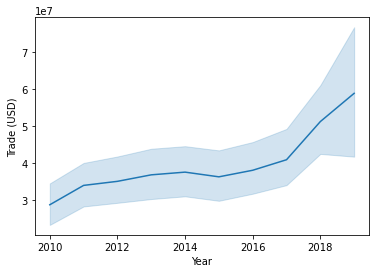

In [164]:
sns.lineplot(data=df_combined_import_vd, x='Year', y='Trade (USD)')

#Overall world imports of Vanderlay's products have been increasing significantly!

In [92]:
#This cell does the same as the above, but only taking into account the most recent year on record (2018)
df_combined_import_vd_dropped_comm = df_combined_import_vd.drop(columns="Commodity")

df_combined_import_2018_vd_dropped_comm = df_combined_import_vd_dropped_comm[df_combined_import_vd.Year == 2018].groupby(["Country or Area"]).sum().sort_values('Trade (USD)', ascending=False).drop(columns='Year')

df_combined_import_2018_vd_dropped_comm.head(10)

# The UK, Germany, China, France, and the Netherlands had the most import value on record (2018) of Vanderlay's product 
# portfolio. This is the almost identical to the above cell, except China appears in the top 5 and the Netherlands drops out.

,Trade (USD),Weight (kg),Quantity
Country or Area,,,
USA,2.608727e+10,1.074123e+10,9.369996e+09
United Kingdom,8.270176e+09,5.311672e+09,5.165618e+09
Germany,8.029014e+09,4.947294e+09,4.907929e+09
EU-28,7.472125e+09,5.230708e+09,7.369221e+08
China,6.433892e+09,2.981213e+09,3.369382e+09
Canada,5.075252e+09,1.628900e+04,1.628900e+04
France,4.829696e+09,3.145512e+09,1.350017e+09
Netherlands,4.274951e+09,8.445716e+09,8.578371e+09
Japan,3.489699e+09,1.803693e+09,1.744857e+09


In [93]:
#The above analysis shows this as the ranking for the countries, using only exact commodity matches as the market:

#(all years in data)
#1) the UK ($76.3 billion)
#2) Germany ($69.5 billion)
#3) Canada ($48.6 billion)
#4) France ($36.7 billion)
#5) The Netherlands ($35.3 billion)

#(2018)
#1) the UK ($8.3 billion)
#2) Germany ($8 billion)
#3) China ($6.4 billion)
#4) Canada ($5.1 billion)
#5) France ($4.8 billion)

In [141]:
#Function - enter a country into fetch_vd_import_2018, and it will return the details of that country's importing in 2018 where
# the products are in Vanderlay's portfolio

def fetch(country_name):
    return(df_combined_import_2018_vd_dropped_comm.loc[country_name])
    
fetch('France')

Trade (USD)    4.829696e+09
Weight (kg)    3.145512e+09
Quantity       1.350017e+09
Name: France, dtype: float64

# Issue tree - Complimentary commodity analysis

In [96]:
#Now I will be looking at the complimentary kinds of products for Vanderlay Beverages - coffee/tea beverages.

df_combined_import_non_vd = df_combined_import[df_combined_import.Commodity.isin(cof_tea_beverages)]
print(df_combined_import_non_vd.size)

99856


In [97]:
## This cell takes into account the above, and groups it by coutnry, summing the quantitative columns
df_combined_import_grouped_non_vd = df_combined_import_non_vd.groupby(["Country or Area"]).sum().sort_values('Trade (USD)', ascending=False)

df_combined_import_grouped_non_vd.head(10)
# Germany, France, Japan, Italy, and Canada have the most import value on record (2010-2018) of complimentary beverage products.

,Year,Trade (USD),Weight (kg),Quantity
Country or Area,,,,
EU-28,159099,1.001084e+11,2.815872e+10,2.834226e+10
USA,159099,5.872605e+10,1.475465e+10,1.465626e+10
Germany,159099,3.676902e+10,1.098311e+10,1.101477e+10
France,159099,2.346907e+10,3.453357e+09,3.453357e+09
Japan,175251,1.699050e+10,4.605431e+09,4.605431e+09
Italy,159099,1.619859e+10,4.370471e+09,4.957377e+09
Canada,175251,1.400313e+10,1.245938e+09,2.068080e+09
United Kingdom,159099,1.176147e+10,2.447943e+09,3.027372e+09
Belgium,159099,1.141117e+10,3.013915e+09,3.014529e+09


In [98]:
#Looking at most recent year on record (2018)
df_combined_import_non_vd_dropped_comm = df_combined_import_non_vd.drop(columns="Commodity")

df_combined_import_2018_non_vd_dropped_comm = df_combined_import_non_vd_dropped_comm[df_combined_import_non_vd.Year == 2018].groupby(["Country or Area"]).sum().sort_values('Trade (USD)', ascending=False)

df_combined_import_2018_non_vd_dropped_comm.head(10)

# Germany, France, Italy, the UK and Japan have the most import value on record (2018) of complimentary beverage products.

,Year,Trade (USD),Weight (kg),Quantity
Country or Area,,,,
EU-28,16144,1.011217e+10,3.126238e+09,3.309779e+09
USA,16144,6.205948e+09,1.701179e+09,1.701179e+09
Germany,16144,3.530395e+09,1.185454e+09,1.217108e+09
France,16144,3.004997e+09,4.807086e+08,4.807086e+08
Italy,16144,1.827629e+09,6.306374e+08,6.306374e+08
United Kingdom,16144,1.460961e+09,7.206347e+07,3.797745e+08
Japan,16144,1.442858e+09,4.394979e+08,4.394979e+08
Netherlands,16144,1.398050e+09,2.944857e+08,2.944857e+08
Canada,16144,1.349547e+09,0.000000e+00,0.000000e+00


In [99]:
#The above analysis shows this as the ranking for the countries, using only complimentary commodity matches as the market:

#(all years in data)
#1) Germany ($36.8 billion)
#2) France ($23.5 billion)
#3) Japan ($17 billion)
#4) Italy ($16.2 billion)
#5) Canada ($14 billion)

#(2018)
#1) Germany ($3.5 billion)
#2) France ($3 billion)
#3) Italy ($1.8 billion)
#4) the UK ($1.5 billion)
#5) Japan ($1.4 billion)

# Competitor Analysis - which countries are the largest exporters of Vanderlay's products types?

In [101]:
# These next cells look at which countries are exporting Vanderlay's products the most, in a similar style as the above
# few cells. This one just filters by exports instead of imports.

df_combined_export = df_combined[(df_combined.Flow == "Export")]
print(df_combined_export.size)

429048


In [102]:
#This cell removes all non-Vanderlay commodities.

df_combined_export_vd = df_combined_export[df_combined_export.Commodity.isin(vanderlay_products)]
print(df_combined_export_vd.size)

165264


In [165]:
df_combined_export_grouped_vd = df_combined_export_vd.groupby(["Country or Area"]).sum().sort_values('Trade (USD)', ascending=False).drop(columns='Year')

df_combined_export_grouped_vd.head(10)


# the France, the UK, Italy, the USA, and Germany have the most export value on record (2010-2018) of Vanderlay's product
# portfolio. This indicates that although Germany and the Netherlands import a lot, they also export plenty as well. There could
# be tough domestic competition if we enter those markets.

,Trade (USD),Weight (kg),Quantity
Country or Area,,,
EU-28,2.854443e+11,9.865577e+10,7.661206e+10
France,1.576896e+11,7.152067e+10,6.124807e+10
United Kingdom,9.255788e+10,2.202069e+10,1.708968e+10
Italy,8.019149e+10,7.904094e+10,7.160574e+10
USA,6.627258e+10,5.138554e+10,5.805492e+10
Germany,5.684548e+10,8.487818e+10,4.655727e+10
Netherlands,4.864102e+10,3.638413e+10,3.715866e+10
Spain,4.136356e+10,2.944083e+10,2.692897e+10
Mexico,3.774128e+10,3.018631e+10,2.604614e+10


In [ ]:
#Top 5 exporting countries of Vanderlay's product portfolio (sum of all years)

#1) France ($157.7 billion)
#2) the UK ($92.6 billion)
#3) Italy ($80.2 billion)
#4) the USA ($66.3 billion)
#5) Germany ($56.8 billion)

# Market growth rate analysis

In [106]:
df_combined_import_countrycount = df_combined_import.groupby(['Year']).count()
df_combined_import_countrycount.head()

,Country or Area,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
Year,,,,,,,
2010,9029,9029,9029,9029,9029,9029,9029
2011,8989,8989,8989,8989,8989,8989,8989
2012,8822,8822,8822,8822,8822,8822,8822
2013,8717,8717,8717,8717,8717,8717,8717
2014,8492,8492,8492,8492,8492,8492,8492


In [147]:
df_combined_import_grouped_vd_grouped_year_country = df_combined_import_vd.groupby(['Country or Area',"Year"]).sum().sort_values(['Country or Area','Year'])
df_combined_import_grouped_vd_grouped_year_country.reset_index()
df_combined_import_grouped_vd_grouped_year_country

Trade (USD)  Weight (kg)     Quantity
Country or Area Year                                       
Afghanistan     2010  30952290.00  26881177.00  26404275.00
                2011  68507502.00  63536739.00  59251361.00
                2015  19726013.00  16372120.00  15621129.00
                2016  25502955.00  24122927.00  21872699.00
                2018  16508957.71  20814913.48  17252676.10
...                           ...          ...          ...
Zimbabwe        2014  56313024.00  81242149.00  96199821.00
                2015  52220443.00  90880768.00  39144118.00
                2016  30363529.00  42977763.00  25015406.00
                2017  25199723.77  29609253.83  16848611.13
                2018  31982628.33  34649686.64   5104315.47

[1462 rows x 3 columns]

In [150]:
#This lets me see the growth rate. #UK, Germany, Canada, France, and the Netherlands were overall top 5.
# Ignore first value.

df_2 = df_combined_import_grouped_vd_grouped_year_country.pct_change()

df_2.loc['United Kingdom', 'Trade (USD)'].round(2)

Year
2010    6.63
2011    0.13
2012   -0.10
2013    0.06
2014    0.00
2015   -0.07
2016   -0.06
2017   -0.01
2018    0.06
Name: Trade (USD), dtype: float64

In [151]:
df_2.loc['Germany', 'Trade (USD)'].round(2)

Year
2010    86.66
2011     0.17
2012    -0.04
2013     0.06
2014    -0.05
2015    -0.14
2016     0.03
2017     0.05
2018     0.08
Name: Trade (USD), dtype: float64

In [152]:
df_2.loc['Canada', 'Trade (USD)'].round(2)

Year
2010    67.26
2011     0.18
2012     0.05
2013     0.04
2014     0.01
2015    -0.08
2016    -0.02
2017     0.05
2018     0.03
2019    -0.02
Name: Trade (USD), dtype: float64

In [153]:
df_2.loc['France', 'Trade (USD)'].round(2)

Year
2010    935.42
2011      0.21
2012     -0.06
2013      0.06
2014     -0.01
2015     -0.12
2016      0.06
2017      0.10
2018      0.13
Name: Trade (USD), dtype: float64

In [154]:
df_2.loc['Netherlands', 'Trade (USD)'].round(2)

Year
2010    54.94
2011     0.33
2012    -0.03
2013     0.05
2014    -0.02
2015    -0.06
2016     0.02
2017     0.03
2018     0.07
Name: Trade (USD), dtype: float64

In [ ]:
# From a look at the above growth rates, France and Germany seem like the most consistent growth markets in the last few years.

In [146]:
df_combined_import_grouped_vd_grouped_year_country = df_combined_import_non_vd.groupby(['Country or Area',"Year"]).sum().sort_values(['Country or Area','Year'])
df_combined_import_grouped_vd_grouped_year_country.reset_index()
df_combined_import_grouped_vd_grouped_year_country

Trade (USD)  Weight (kg)     Quantity
Country or Area Year                                        
Afghanistan     2010  3.804999e+07  30867737.00  30867737.00
                2011  8.591472e+07  63223565.00  63223565.00
                2012  6.906380e+07  54145644.00  54145644.00
                2013  1.510823e+08  98192340.00  98192340.00
                2014  1.117107e+08  98678340.00  98678340.00
...                            ...          ...          ...
Zimbabwe        2014  3.420305e+06    742093.00    742093.00
                2015  3.224400e+06    756515.00    756515.00
                2016  3.112128e+06    648298.00    648298.00
                2017  3.116803e+06    544329.35    544329.35
                2018  2.788589e+06    348137.87    348137.87

[1461 rows x 3 columns]

In [148]:
df_3 = df_combined_import_grouped_vd_grouped_year_country.pct_change()

df_3.loc['Germany', 'Trade (USD)'].round(2)


Year
2010    6.63
2011    0.13
2012   -0.10
2013    0.06
2014    0.00
2015   -0.07
2016   -0.06
2017   -0.01
2018    0.06
Name: Trade (USD), dtype: float64

In [155]:
df_3.loc['France', 'Trade (USD)'].round(2)

Year
2010    935.42
2011      0.21
2012     -0.06
2013      0.06
2014     -0.01
2015     -0.12
2016      0.06
2017      0.10
2018      0.13
Name: Trade (USD), dtype: float64

In [156]:
df_3.loc['Japan', 'Trade (USD)'].round(2)

Year
2010    22.00
2011     0.22
2012     0.07
2013    -0.04
2014    -0.00
2015    -0.08
2016     0.01
2017     0.03
2018     0.02
2019     0.05
Name: Trade (USD), dtype: float64

In [157]:
df_3.loc['Italy', 'Trade (USD)'].round(2)

Year
2010    3.91
2011    0.12
2012   -0.04
2013    0.00
2014   -0.05
2015   -0.07
2016    0.01
2017    0.10
2018    0.16
Name: Trade (USD), dtype: float64

In [158]:
df_3.loc['Canada', 'Trade (USD)'].round(2)

Year
2010    67.26
2011     0.18
2012     0.05
2013     0.04
2014     0.01
2015    -0.08
2016    -0.02
2017     0.05
2018     0.03
2019    -0.02
Name: Trade (USD), dtype: float64

In [ ]:
# From a look at the above growth rates, France and Italy seem like the most consistent growth markets in the last few years.

In [125]:
df_4 = df_combined_import_grouped_vd_grouped_year_country
delta = 0
for index, value in df_4.iterrows():
    print('index:')
    print(index)
    print('value:')
    #print(type(value))
    print(value[0])
    delta = value[0] - delta
    print('delta:')
    print(delta)
    print()
    #have to add if then statement so delta resets after a country is done
    #can set delta = 0

index:
('Afghanistan', 2010)
value:
30952290.0
delta:
30952290.0

index:
('Afghanistan', 2011)
value:
68507502.0
delta:
37555212.0

index:
('Afghanistan', 2015)
value:
19726013.0
delta:
-17829199.0

index:
('Afghanistan', 2016)
value:
25502955.0
delta:
43332154.0

index:
('Afghanistan', 2018)
value:
16508957.709999999
delta:
-26823196.29

index:
('Albania', 2010)
value:
89541708.0
delta:
116364904.28999999

index:
('Albania', 2011)
value:
97287487.0
delta:
-19077417.28999999

index:
('Albania', 2012)
value:
91290676.0
delta:
110368093.28999999

index:
('Albania', 2013)
value:
98465310.0
delta:
-11902783.289999992

index:
('Albania', 2014)
value:
44069334.0
delta:
55972117.28999999

index:
('Albania', 2015)
value:
67094712.0
delta:
11122594.710000008

index:
('Albania', 2016)
value:
78533850.0
delta:
67411255.28999999

index:
('Albania', 2017)
value:
62641746.33
delta:
-4769508.959999993

index:
('Albania', 2018)
value:
63762464.08
delta:
68531973.03999999

index:
('Algeria', 2010)
valu

In [108]:
df_combined['Country or Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Rep.', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Isds', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cyprus', 'Czech Rep.', 'Denmark', 'Dominica', 'Dominican Rep.',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'EU-28',
       'Fiji', 'Finland', 'Fmr Sudan', 'France', 'French Polynesia',
       'FS Micronesia', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland

In [ ]:
#Final Picks: The UK, Germany, and Canada. The UK had the highest import value of Vanderlay's products, and imported more than
# it exported. Germany has a sizable market, strong growth percentage, and imported more than they exported. Lastly, Canada
# has a very large market for its population, considering it is does not show up in the foremost exporters, but has an import
# total with countries twice its population.